## Домашнее задание 

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

#### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split, ParameterGrid

#### 1. Определение функций, которые понадобяться для обучения

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [3]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

In [7]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

#### 2. Подготовка тренировочных данных

In [8]:
# получения данных из csv файла Iris.csv
iris_data = pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


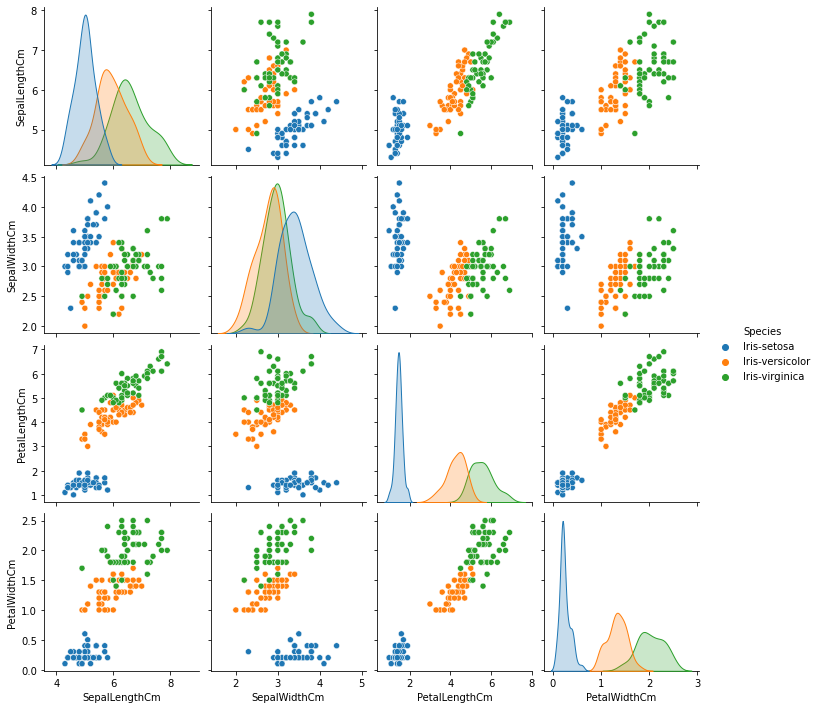

In [9]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

In [10]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [11]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)
x

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [12]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [13]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### 3. Обучение нейронной сети

In [14]:
# Функция для обучения нейронной сети
def train(n_iter, params):
    learning_rate = params['learning_rate']
    epochs = params['epochs']

    errors_all = list()
    accuracy_all = list()

    for iter in range(n_iter):
        # случайные веса
        w0 = 2 * np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
        w1 = 2 * np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

        errors = []
        accuracy = 0

        # процесс обучения
        for i in range(epochs + 1):

            # прямое распространение(feed forward)
            layer_0 = X_train
            layer_1 = sigmoid(np.dot(layer_0, w0))
            layer_2 = sigmoid(np.dot(layer_1, w1))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer_2_error = y_train - layer_2
            layer_2_delta = layer_2_error * sigmoid_deriv(layer_2)
            
            layer_1_error = layer_2_delta.dot(w1.T)
            layer_1_delta = layer_1_error * sigmoid_deriv(layer_1)
            
            w1 += layer_1.T.dot(layer_2_delta) * learning_rate
            w0 += layer_0.T.dot(layer_1_delta) * learning_rate
            
            error = np.mean(np.abs(layer_2_error))
            errors.append(error)
            accuracy = (1 - error) * 100
        
        errors_all.append(errors)
        accuracy_all.append(accuracy)
    
    return errors_all, accuracy_all

In [15]:
# Функция для построения диаграммы точности обучения
def plot(errors, accuracy):
    plt.plot(errors)
    plt.xlabel('Train')
    plt.ylabel('Error')
    plt.title(f"Accuracy " + str(round(accuracy,2)) + "%")
    plt.show()

#1: {'epochs': 1000, 'learning_rate': 0.1}


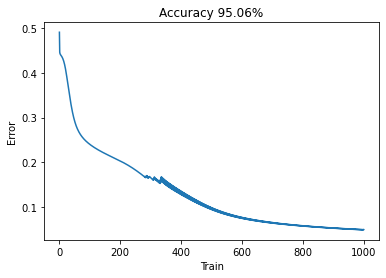

#2: {'epochs': 1000, 'learning_rate': 0.3}


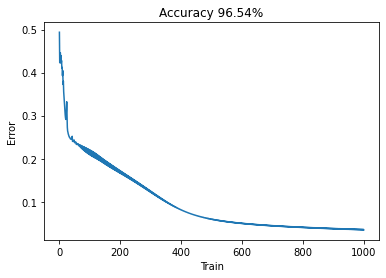

#3: {'epochs': 1000, 'learning_rate': 0.6}


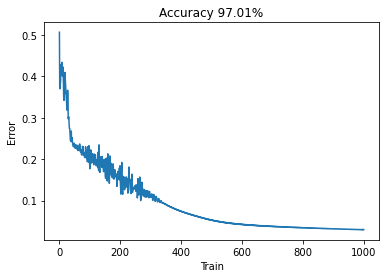

#4: {'epochs': 10000, 'learning_rate': 0.1}


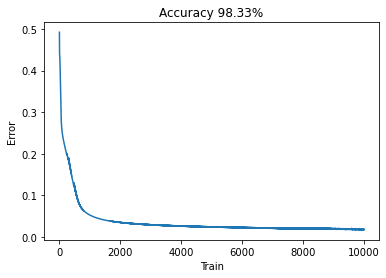

#5: {'epochs': 10000, 'learning_rate': 0.3}


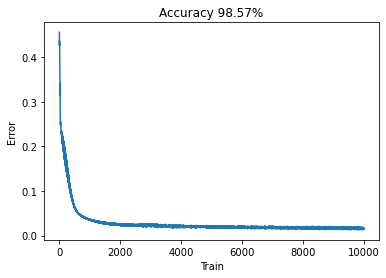

#6: {'epochs': 10000, 'learning_rate': 0.6}


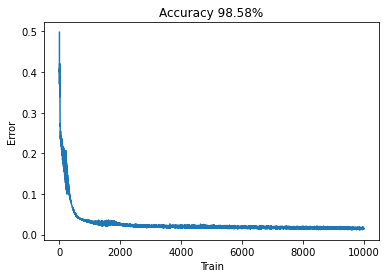

In [16]:
# Обучение нейронной сети
n_iter = 5

param_grid = {
    'learning_rate': [0.1, 0.3, 0.6],
    'epochs': [1000, 10000],
}

results = dict()
grid = list(ParameterGrid(param_grid))
cnt  = 0
for params in grid:
    cnt += 1
    print(f'#{cnt}: {params}')
    errors, accuracy = train(n_iter, params)
    results[cnt] = {
        'accuracy': np.mean(accuracy),
        'error': np.mean(errors),
        'params': str(params)
    }
    plot(np.mean(errors, axis=0), np.mean(accuracy, axis=0))

### 4. Результаты

In [17]:
pd.DataFrame.from_dict(results, orient='index').sort_values(by='accuracy', ascending=False)

,accuracy,error,params
6,98.580735,0.026727,"{'epochs': 10000, 'learning_rate': 0.6}"
5,98.567681,0.028408,"{'epochs': 10000, 'learning_rate': 0.3}"
4,98.329455,0.036953,"{'epochs': 10000, 'learning_rate': 0.1}"
3,97.007763,0.092840,"{'epochs': 1000, 'learning_rate': 0.6}"
2,96.542048,0.099638,"{'epochs': 1000, 'learning_rate': 0.3}"
1,95.061229,0.130850,"{'epochs': 1000, 'learning_rate': 0.1}"


### 5. Выводы

При увеличении количества эпох точность нейронной сети улучшается


При увеличении learnig_rate точность снижается, поскольку увеличивается шаг